## Part 1:
A description of the problem and a discussion of the background.
<br>
A description of the data and how it will be used to solve the problem.

### Introduction
This project is mainly for people who aim to relocate to a different city due to a new job offering and wish to live up to their standards in the new city.
<br>
I will try to provide suggestions on the neighborhoods based on what factors need to be considered gathered from particular individual.
<br>
In this project, we will make few assumptions.
1. The new city is assumed to be unfamiliar to the individual. For our purpose, assuming the city is Los Angeles. 
2. The individual is assumed to be Stella, software engineer, who has been working and living in New York City for years.
3. The individual is assumed to be well aware of the new job salary. For our purpose, assuming the annual income is $120,000 / year.

### Business Problem
In this project, I will be focus on problems Stella might encounter while deciding to taking on a new job offering in Los Angeles.
<br>
Before moving to a different city for the new job, there are many factors that one need to consider. As per example, Stella has the following concerns.
- Since she's new to the city, she would like to live in somewhere safe. 
- She would like to rent a place. The price is open for discussion depends on location and other attributes.
- She doesn't cook as often, so she would like to live around various restaurants
- Being close to various venues other than restaurants is a big plus.
<br>

The real challenge starts from how do we use these factors to make reasonable suggestions to Stella, so that she can better adapt to the new environment as well as living up to her standards.
<br>
Now let's break it into parts. I will be analyzing each part separately and then integrating all parts together for final analysis and visualization.
<br>

1st problem is, what data will be based on in order to determine whether a particular area of the city is considered safer than other areas?
<br>
2nd problem is, what data will be used in order to determine which apartment Stella should rent?
<br> 
3rd problem is, instead of filtering all restaurants near one particular area, what other criteria will be needed to filter various types of restaurant? ie. Chinese food, Indian food and Italian food, etc.
<br>
4th problem is, various venues are way to general, is there a way to prioritize certain venues over others?
<br>

For Part 2 of this project, I will use all the tools learned from this specialization plus some other references to solve these problems one by one.



### Data Acquiring and How it will be used
1. The first piece of information needed in my opinion would be Los Angeles Crime Data, which can be obtained at https://data.lacity.org/A-Safe-City/Crime-Data-from-2010-to-Present/63jg-8b9z. For our purpose however, I will use a much smaller sample of this dataset which can be obtained at https://usc.data.socrata.com/Los-Angeles/Part-I-Crimes-LA-/qfdv-ru39.
<br>
I will extract the neighborhoods with lowest crime counts. And from the result I will extract the types of crimes occurred most frequently in those neighborhood. The process will be similar to what we did in the SQL course.
<br>
2. Secondly I will need the data for housing price and rent cost in Los Angeles. For rent price, https://usc.data.socrata.com/Los-Angeles/Rent-Price-LA-/4a97-v5tx.
<br>
I will extract average price each neighborhood for rent price data, and then do the same for the home price data. Additional data analysis may be needed, but I will not specify them.
<br>
One thing to be noted is that all the datasets listed are found on the Internet from various websites. I cannot guarantee the accuracy of the data itself.
<br>
The process will be similar to what we did in the Data Analysis course.
<br>
3. Next, I will use FOURSQUARE API to obtain the remaining data about venues around each neighborhood. This includes restaurants, transportation and others. 
I will filter the neighborhoods which offer big variety of types of restaurants, as well as neighborhoods which are relatively close to major transportation services.
<br>
Again, additional data analysis might be needed, and I will not specify them. The process will be similar to what we did in the last three modules.
<br>

Finally, after all the gathered data being analyzed, I will combine all the data into one table. I will make several visualizations including plot, charts, map and clustering. This process will be similar to what we did in the Data Visualization course. Then based on all the previous work, I will make as reasonable suggestions as the solution of this problem proposed in the project.  

## Part 2:
A link to your Notebook on your Github repository, showing your code.
<br>
A full report consisting of all of the following components.
- Introduction where you discuss the business problem and who would be interested in this project.
- Data where you describe the data that will be used to solve the problem and the source of the data.
- Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, if any, and what machine learnings were used and why.
- Results section where you discuss the results.
- Discussion section where you discuss any observations you noted and any recommendations you can make based on the results.
- Conclusion section where you conclude the report.
<br>

Your choice of a presentation or blogpost.

In [29]:
import pandas as pd
import numpy as np

%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

In [30]:
# Transfer Los Angeles Crime Data into dataframe
filename1 = "https://usc.data.socrata.com/api/views/qfdv-ru39/rows.csv"
df1 = pd.read_csv(filename1)
df1.head()

,Policy Area,Dataset,Variable,Year,Count,Tract,Tract Number,Neighborhood,GEOID,Location,Row ID,Date
0,Public Safety,Part I Crimes,Part I Violent Crimes,2012,0.000000,"Census Tract 1021.05, Los Angeles County, Cali...",102105,Sun Valley,1400000US06037102105,"(34.210852, -118.3480495)",Part_I_Violent_Crimes_2012_1400000US06037102105,01/01/2012
1,Public Safety,Part I Crimes,Part I Property Crimes,2013,11.199729,"Census Tract 9001.04, Los Angeles County, Cali...",900104,Northeast Antelope Valley,1400000US06037900104,"(34.587324, -117.844901)",Part_I_Property_Crimes_2013_1400000US06037900104,01/01/2013
2,Public Safety,Part I Crimes,Part I Property Crimes,2015,18.944519,"Census Tract 2094.02, Los Angeles County, Cali...",209402,Westlake,1400000US06037209402,"(34.0546635, -118.2772135)",Part_I_Property_Crimes_2015_1400000US06037209402,01/01/2015
3,Public Safety,Part I Crimes,Part I Violent Crimes,2014,4.766444,"Census Tract 1898, Los Angeles County, California",189800,Hollywood,1400000US06037189800,"(34.0980545, -118.359927)",Part_I_Violent_Crimes_2014_1400000US06037189800,01/01/2014
4,Public Safety,Part I Crimes,Part I Property Crimes,2016,29.012024,"Census Tract 5540.01, Los Angeles County, Cali...",554001,Bellflower,1400000US06037554001,"(33.898299, -118.1330425)",Part_I_Property_Crimes_2016_1400000US06037554001,01/01/2016


In [31]:
df1 = df1[['Neighborhood', 'Count']]
df1.head()

,Neighborhood,Count
0,Sun Valley,0.000000
1,Northeast Antelope Valley,11.199729
2,Westlake,18.944519
3,Hollywood,4.766444
4,Bellflower,29.012024


In [32]:
# Drop all rows with missing values
df1.dropna(inplace=True)

In [33]:
# Find the sum of all crimes in each neighborhood
df_crime = df1.groupby(['Neighborhood']).sum()
df_crime.head()

,Count
Neighborhood,
Acton,153.152215
Adams-Normandie,541.648985
Agoura Hills,189.029737
Agua Dulce,44.202726
Alondra Park,105.068139


In [34]:
df_crime = df_crime.reset_index()
df_crime.head()

,Neighborhood,Count
0,Acton,153.152215
1,Adams-Normandie,541.648985
2,Agoura Hills,189.029737
3,Agua Dulce,44.202726
4,Alondra Park,105.068139


In [35]:
#Assign weights to the count for each neighborhood using mean function
print (df_crime['Count'].mean())
df_crime['Weight_x'] = (df_crime['Count'].mean()-df_crime['Count'])/df_crime['Count'].mean()
df_crime.head()

2368.289109686696


,Neighborhood,Count,Weight_x
0,Acton,153.152215,0.935332
1,Adams-Normandie,541.648985,0.771291
2,Agoura Hills,189.029737,0.920183
3,Agua Dulce,44.202726,0.981336
4,Alondra Park,105.068139,0.955635


In [136]:
# Take the top 95 percentile neighborhoods with lowest crime count for visulization purpose
df_crime_weight = df_crime[df_crime['Weight_x']>0.95].head(20)
df_crime_weight.head()

,Neighborhood,Count,Weight_x
3,Agua Dulce,44.202726,0.981336
4,Alondra Park,105.068139,0.955635
7,Arcadia,72.263315,0.969487
13,Avalon,86.565711,0.963448
16,Bel-Air,78.544445,0.966835


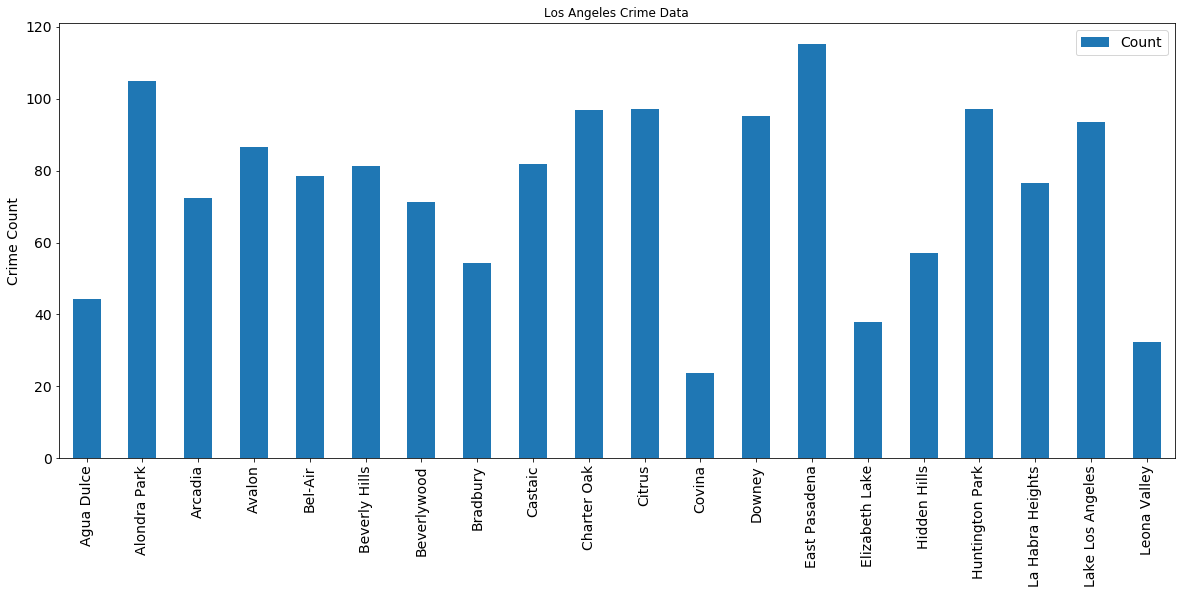

In [137]:
# Plot bar chart with respect to the count per thousand
df_crime_weight.plot(kind='bar', x='Neighborhood', y='Count', figsize=(20, 8), fontsize = 14)
plt.xlabel('') # add to x-label to the plot
plt.ylabel('Crime Count', fontsize=14) # add y-label to the plot
plt.title('Los Angeles Crime Data') # add title to the plot
plt.legend(fontsize=14)
plt.show()

- After giving some considerations, I decided to use Neighborhood Safety as the main factor, say it weights about 30% - among all factors.
- Rent price, say it weights about 25% among all factors.
- Nearby Restaurants, say it weights about 25% among all factors.
- Other venues, say it weights about 20% among all factors.
- The reason is because we assumed that Stella is unfamiliar with the city.
- In my opinion, She is more likely choose safety first over anything else.

In [38]:
# Transfer Los Angeles rent price into dataframe
filename2 = "https://usc.data.socrata.com/api/views/4a97-v5tx/rows.csv"
df2 = pd.read_csv(filename2)
df2.head()

,Policy Area,Dataset,Variable,Year,Amount,Tract,Tract Number,Neighborhood,GEOID,Location,Row ID,Date
0,Housing & Real Estate,Rent Price,Median Rent Price,2015,1115.0,"Census Tract 9200.23, Los Angeles County, Cali...",920023,Santa Clarita,1400000US06037920023,"(34.4214975, -118.4905135)",Median_Rent_Price_2015_1400000US06037920023,01/01/2015
1,Housing & Real Estate,Rent Price,Median Rent Price,2015,1038.0,"Census Tract 5344.04, Los Angeles County, Cali...",534404,Cudahy,1400000US06037534404,"(33.966232, -118.190553)",Median_Rent_Price_2015_1400000US06037534404,01/01/2015
2,Housing & Real Estate,Rent Price,Median Rent Price,2015,1031.0,"Census Tract 5336.01, Los Angeles County, Cali...",533601,Bell,1400000US06037533601,"(33.9803325, -118.194495)",Median_Rent_Price_2015_1400000US06037533601,01/01/2015
3,Housing & Real Estate,Rent Price,Median Rent Price,2015,1362.0,"Census Tract 4053.02, Los Angeles County, Cali...",405302,West Covina,1400000US06037405302,"(34.0767645, -117.946434)",Median_Rent_Price_2015_1400000US06037405302,01/01/2015
4,Housing & Real Estate,Rent Price,Median Rent Price,2015,919.0,"Census Tract 2042, Los Angeles County, California",204200,Boyle Heights,1400000US06037204200,"(34.043615, -118.205084)",Median_Rent_Price_2015_1400000US06037204200,01/01/2015


In [39]:
df2 = df2[['Neighborhood', 'Amount']]
df2.head()

,Neighborhood,Amount
0,Santa Clarita,1115.0
1,Cudahy,1038.0
2,Bell,1031.0
3,West Covina,1362.0
4,Boyle Heights,919.0


In [40]:
# Drop all rows with missing values
df2.dropna(inplace=True)

In [41]:
# Find the mean of all rent prices in each neighborhood
df_rent = df2.groupby(['Neighborhood']).mean()
df_rent.head()

,Amount
Neighborhood,
Acton,1647.500000
Adams-Normandie,920.742857
Agoura Hills,2052.500000
Agua Dulce,1130.200000
Alhambra,1205.564286


In [42]:
df_rent = df_rent.reset_index()
df_rent.head()

,Neighborhood,Amount
0,Acton,1647.500000
1,Adams-Normandie,920.742857
2,Agoura Hills,2052.500000
3,Agua Dulce,1130.200000
4,Alhambra,1205.564286


In [43]:
#Assign weights to the amount for each neighborhood using mean function
print (df_rent['Amount'].mean())
df_rent['Weight_y'] = (df_rent['Amount'].mean()-df_rent['Amount'])/df_rent['Amount'].mean()
df_rent.head()

1389.07317405552


,Neighborhood,Amount,Weight_y
0,Acton,1647.500000,-0.186043
1,Adams-Normandie,920.742857,0.337153
2,Agoura Hills,2052.500000,-0.477604
3,Agua Dulce,1130.200000,0.186364
4,Alhambra,1205.564286,0.132109


In [44]:
# Merge df_crime and df_rent
df_merge = pd.merge(df_crime, df_rent, on='Neighborhood', how='inner')
df_merge.head()

,Neighborhood,Count,Weight_x,Amount,Weight_y
0,Acton,153.152215,0.935332,1647.500000,-0.186043
1,Adams-Normandie,541.648985,0.771291,920.742857,0.337153
2,Agoura Hills,189.029737,0.920183,2052.500000,-0.477604
3,Agua Dulce,44.202726,0.981336,1130.200000,0.186364
4,Alondra Park,105.068139,0.955635,1667.142857,-0.200184


In [45]:
data_rent = df_rent.head(20)

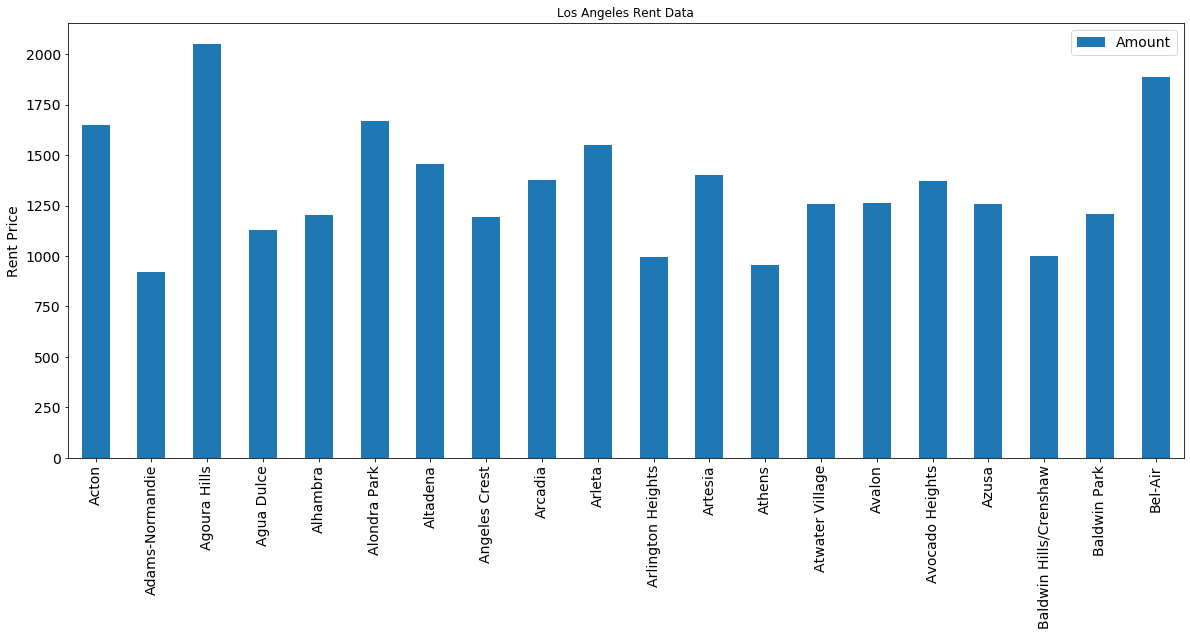

In [46]:
# Plot bar chart with respect to the rent price
data_rent.plot(kind='bar', x='Neighborhood', y='Amount', figsize=(20, 8), fontsize = 14)
plt.xlabel('') # add to x-label to the plot
plt.ylabel('Rent Price', fontsize=14) # add y-label to the plot
plt.title('Los Angeles Rent Data') # add title to the plot
plt.legend(fontsize=14)
plt.show()

Here I have to make some changes in the proposed problem, due to lack of data on the home prices in each neighborhood.
<br>
I couldn't find an API that offers the required dataset.
<br>
Let's now assume that Stella wants to rent a place, price is open for discussion depends on location and other attributes.

In [47]:
# I suspected that there is some relation between crime count and rent price
# After verify using the corr() function, I was quite surprised with the result
df_merge[["Count", "Amount"]].corr()

,Count,Amount
Count,1.000000,0.062265
Amount,0.062265,1.000000


(0, 300000)

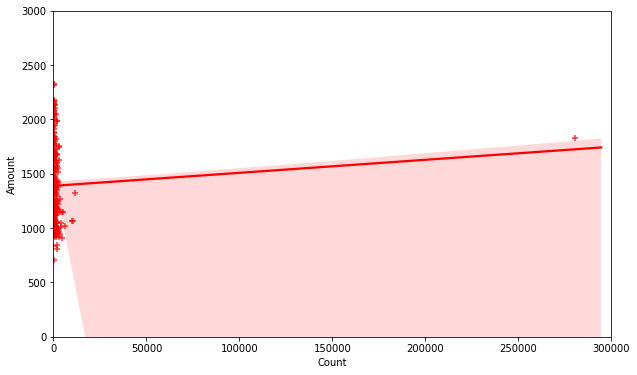

In [48]:
# Let's visualize
ax = sns.regplot(x="Count", y="Amount", data=df_merge, color='red', marker='+')
ax.figure.set_size_inches(10, 6)
ax.set_ylim(0, 3000)
ax.set_xlim(0, 300000)

In [21]:
import requests # library to handle requests
import random # library for random number generation

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Folium installed
Libraries imported.


In [49]:
CLIENT_ID = 'SFEMYL0NXASTELCV3LEWIMICVFLI5S1TKJ3PIPXMZYQZPLY5'
CLIENT_SECRET = 'MMYK4TVIEC1HKSB0RYWZPCP5ACW1MH4O5OODR1JPLE1BGK5E'
VERSION = '20180604'
LIMIT = 50
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: SFEMYL0NXASTELCV3LEWIMICVFLI5S1TKJ3PIPXMZYQZPLY5
CLIENT_SECRET:MMYK4TVIEC1HKSB0RYWZPCP5ACW1MH4O5OODR1JPLE1BGK5E


In [50]:
# Add LA to all neighborhood
s = df_merge['Neighborhood'].map(str) + ", Los Angeles"
s.head()

0              Acton, Los Angeles
1    Adams-Normandie, Los Angeles
2       Agoura Hills, Los Angeles
3         Agua Dulce, Los Angeles
4       Alondra Park, Los Angeles
Name: Neighborhood, dtype: object

In [24]:
from geopy import geocoders
from geopy.exc import GeocoderTimedOut

In [25]:
# Find location of all neighborhoods in LA
index = pd.Index(s)
err = []
for item in s:
    geolocator = Nominatim(user_agent="foursquare_agent")
    try:
        location = geolocator.geocode(item, timeout=10)
        latitude = location.latitude
        longitude = location.longitude
        print(location.latitude, location.longitude)
    except AttributeError:
        err.append(index.get_loc(item))
        print(index.get_loc(item), ": Problem with data or cannot Geocode.")

34.4807415 -118.186837863866
34.0330812 -118.2971147
34.1363945 -118.7745348
34.4963817 -118.3256348
33.890134 -118.335133433601
34.1863161 -118.1352329
34.2339996 -118.1833862
34.1362075 -118.0401497
34.2413266 -118.4322047
34.1285566 -118.1529994
33.8690197 -118.0796195
33.920407 -118.2790494
34.1163979 -118.2564637
33.34221 -118.3272612
34.0269825 -117.96543306543
34.0124369 -118.3405636
34.0827278 -118.4479802
33.8825705 -118.1167679
18 : Problem with data or cannot Geocode.
-34.9375839 -54.9157854
34.0696501 -118.3963062
34.0466335 -118.395038
34.0331656 -118.2048648
34.1469511 -117.9708982
34.0521403 -118.4740699
25 : Problem with data or cannot Geocode.
34.1446643 -118.6440973
34.2010776 -118.5978259
33.8322043 -118.2517547
34.0561214 -118.3734109
34.4888822 -118.6228656
31 : Problem with data or cannot Geocode.
-23.468371 -47.4794984
34.0574263 -118.4147267
33.8644291 -118.0539323
34.0997988 -117.872592909234
34.2595715 -118.6023247
34.2595715 -118.6023247
38 : Problem with dat

In [26]:
print(err)

[18, 25, 31, 38, 61, 73, 80, 112, 120, 129, 131, 172, 183, 184, 185, 186, 189, 193, 195, 197]


In [51]:
# I ran into error on few of the neighborhoods' locations
# I will remove them here. 
# One thing to be noted is that this is a relatively small dataset, I honestly don't know how to automatically catch all indices with error.
df_merge_adj = df_merge.drop(df_merge.index[err])
df_merge_adj.head()

,Neighborhood,Count,Weight_x,Amount,Weight_y
0,Acton,153.152215,0.935332,1647.500000,-0.186043
1,Adams-Normandie,541.648985,0.771291,920.742857,0.337153
2,Agoura Hills,189.029737,0.920183,2052.500000,-0.477604
3,Agua Dulce,44.202726,0.981336,1130.200000,0.186364
4,Alondra Park,105.068139,0.955635,1667.142857,-0.200184


In [52]:
# I also spotted few wrong coordinates. Let's remove them as well.
df_merge_adj = df_merge_adj.drop(df_merge.index[[19, 32, 84, 118 ]])
df_merge_adj.head()

,Neighborhood,Count,Weight_x,Amount,Weight_y
0,Acton,153.152215,0.935332,1647.500000,-0.186043
1,Adams-Normandie,541.648985,0.771291,920.742857,0.337153
2,Agoura Hills,189.029737,0.920183,2052.500000,-0.477604
3,Agua Dulce,44.202726,0.981336,1130.200000,0.186364
4,Alondra Park,105.068139,0.955635,1667.142857,-0.200184


In [53]:
s_adj = df_merge_adj['Neighborhood'].map(str) + ", Los Angeles"
s_adj.head()

0              Acton, Los Angeles
1    Adams-Normandie, Los Angeles
2       Agoura Hills, Los Angeles
3         Agua Dulce, Los Angeles
4       Alondra Park, Los Angeles
Name: Neighborhood, dtype: object

In [54]:
lat = []
lng = []
for item in s_adj:
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(item, timeout=10)
    latitude = location.latitude
    longitude = location.longitude
    lat.extend([latitude])
    lng.extend([longitude])

In [55]:
df_merge_adj['Latitude'] = lat
df_merge_adj['Longitude'] = lng
df_merge_adj.head()

,Neighborhood,Count,Weight_x,Amount,Weight_y,Latitude,Longitude
0,Acton,153.152215,0.935332,1647.500000,-0.186043,34.480742,-118.186838
1,Adams-Normandie,541.648985,0.771291,920.742857,0.337153,34.033081,-118.297115
2,Agoura Hills,189.029737,0.920183,2052.500000,-0.477604,34.136395,-118.774535
3,Agua Dulce,44.202726,0.981336,1130.200000,0.186364,34.496382,-118.325635
4,Alondra Park,105.068139,0.955635,1667.142857,-0.200184,33.890134,-118.335133


In [56]:
# create map of Los Angeles using latitude and longitude values
map_LA = folium.Map(location=[34.0522, -118.2437], zoom_start=10)

# add markers to map
for lat, lng, neighborhood in zip(df_merge_adj['Latitude'], df_merge_adj['Longitude'], df_merge_adj['Neighborhood']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_LA)  
    
map_LA

In [57]:
# Create a function to use FOURSQUARE API to search restaurant venues in each neighborhood
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [58]:
neighborhood_venues = getNearbyVenues(names=df_merge_adj['Neighborhood'],
                                   latitudes=df_merge_adj['Latitude'],
                                   longitudes=df_merge_adj['Longitude'],
                                   radius=500
                                  )

In [66]:
print(neighborhood_venues.shape)
neighborhood_venues

(3141, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Adams-Normandie,34.033081,-118.297115,Orange Door Sushi,34.032270,-118.299541,Sushi Restaurant
1,Adams-Normandie,34.033081,-118.297115,Ignatius Cafe,34.031772,-118.293006,Café
2,Adams-Normandie,34.033081,-118.297115,Sushi Delight,34.032445,-118.299525,Sushi Restaurant
3,Adams-Normandie,34.033081,-118.297115,Little Xian,34.032292,-118.299465,Sushi Restaurant
4,Adams-Normandie,34.033081,-118.297115,Shell,34.033095,-118.300025,Gas Station
5,Adams-Normandie,34.033081,-118.297115,Tacos La Estrella,34.032230,-118.300757,Taco Place
6,Adams-Normandie,34.033081,-118.297115,Don Rigo's Tacos & Pupuseria,34.036576,-118.299249,Mexican Restaurant
7,Adams-Normandie,34.033081,-118.297115,kwik-e mart,34.037119,-118.297423,Donut Shop
8,Adams-Normandie,34.033081,-118.297115,The Wall,34.037014,-118.298325,Scenic Lookout
9,Adams-Normandie,34.033081,-118.297115,Jack in the Box,34.033412,-118.291863,Fast Food Restaurant


In [59]:
count_restaurant = neighborhood_venues.groupby('Neighborhood')['Venue Category'].apply(lambda x: x[x.str.contains('Restaurant')].count())
count_restaurant.head()

Neighborhood
Adams-Normandie    5
Agoura Hills       1
Agua Dulce         1
Alondra Park       0
Altadena           1
Name: Venue Category, dtype: int64

In [60]:
# Count the number of restaurants in each 
df_merge_restaurant = pd.merge(df_merge_adj, count_restaurant, on='Neighborhood', how='left')
df_merge_restaurant.head()

,Neighborhood,Count,Weight_x,Amount,Weight_y,Latitude,Longitude,Venue Category
0,Acton,153.152215,0.935332,1647.500000,-0.186043,34.480742,-118.186838,NaN
1,Adams-Normandie,541.648985,0.771291,920.742857,0.337153,34.033081,-118.297115,5.0
2,Agoura Hills,189.029737,0.920183,2052.500000,-0.477604,34.136395,-118.774535,1.0
3,Agua Dulce,44.202726,0.981336,1130.200000,0.186364,34.496382,-118.325635,1.0
4,Alondra Park,105.068139,0.955635,1667.142857,-0.200184,33.890134,-118.335133,0.0


In [61]:
df_merge_restaurant.rename(columns={"Venue Category": "Number of Restaurants"}, inplace=True)
df_merge_restaurant.head()

,Neighborhood,Count,Weight_x,Amount,Weight_y,Latitude,Longitude,Number of Restaurants
0,Acton,153.152215,0.935332,1647.500000,-0.186043,34.480742,-118.186838,NaN
1,Adams-Normandie,541.648985,0.771291,920.742857,0.337153,34.033081,-118.297115,5.0
2,Agoura Hills,189.029737,0.920183,2052.500000,-0.477604,34.136395,-118.774535,1.0
3,Agua Dulce,44.202726,0.981336,1130.200000,0.186364,34.496382,-118.325635,1.0
4,Alondra Park,105.068139,0.955635,1667.142857,-0.200184,33.890134,-118.335133,0.0


In [62]:
# As you can see above, there are certain neighborhoods with no restaurant venue data
# We drop these rows since nearby restaurants were given quite some weights by Stella
df_merge_restaurant.dropna(inplace=True)

In [63]:
df_merge_restaurant.head()

,Neighborhood,Count,Weight_x,Amount,Weight_y,Latitude,Longitude,Number of Restaurants
1,Adams-Normandie,541.648985,0.771291,920.742857,0.337153,34.033081,-118.297115,5.0
2,Agoura Hills,189.029737,0.920183,2052.500000,-0.477604,34.136395,-118.774535,1.0
3,Agua Dulce,44.202726,0.981336,1130.200000,0.186364,34.496382,-118.325635,1.0
4,Alondra Park,105.068139,0.955635,1667.142857,-0.200184,33.890134,-118.335133,0.0
5,Altadena,521.410078,0.779837,1458.321429,-0.049852,34.186316,-118.135233,1.0


In [64]:
data_restaurant = df_merge_restaurant.head(20)

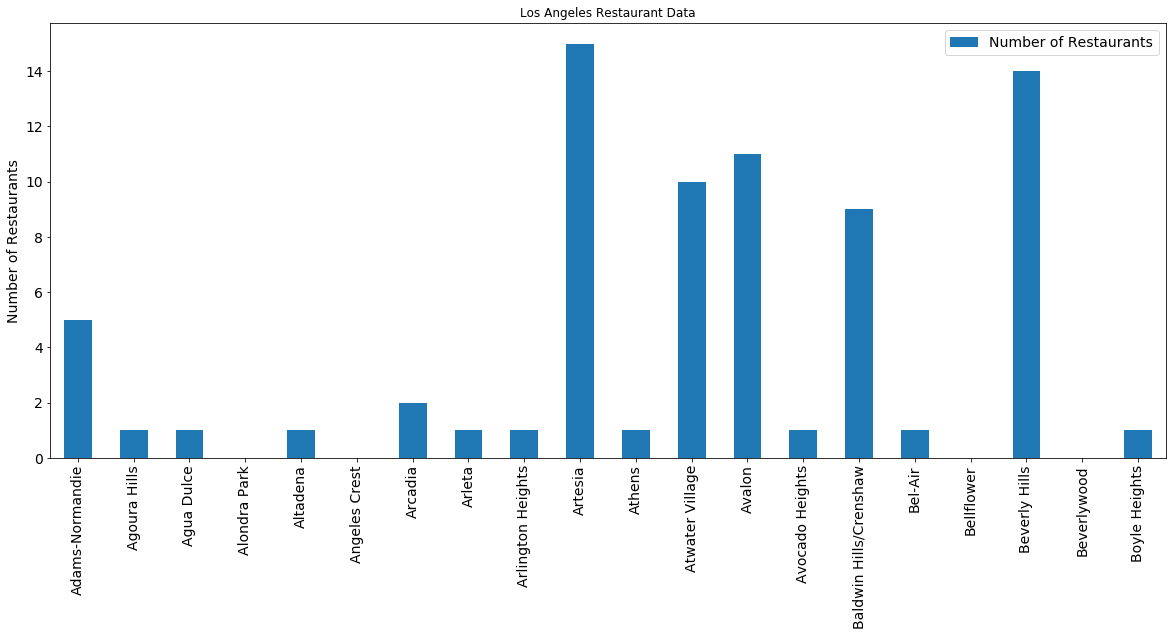

In [65]:
# Plot bar chart with respect to the number of restaurants
data_restaurant.plot(kind='bar', x='Neighborhood', y='Number of Restaurants', figsize=(20, 8), fontsize = 14)
plt.xlabel('') # add to x-label to the plot
plt.ylabel('Number of Restaurants', fontsize=14) # add y-label to the plot
plt.title('Los Angeles Restaurant Data') # add title to the plot
plt.legend(fontsize=14)
plt.show()

In [66]:
#Assign weights to the number of restaurants for each neighborhood using mean function
print (df_merge_restaurant['Number of Restaurants'].mean())
df_merge_restaurant['Weight_z'] = (df_merge_restaurant['Number of Restaurants']-df_merge_restaurant['Number of Restaurants'].mean())/df_merge_restaurant['Number of Restaurants'].mean()
df_merge_restaurant.head()

4.371727748691099


,Neighborhood,Count,Weight_x,Amount,Weight_y,Latitude,Longitude,Number of Restaurants,Weight_z
1,Adams-Normandie,541.648985,0.771291,920.742857,0.337153,34.033081,-118.297115,5.0,0.143713
2,Agoura Hills,189.029737,0.920183,2052.500000,-0.477604,34.136395,-118.774535,1.0,-0.771257
3,Agua Dulce,44.202726,0.981336,1130.200000,0.186364,34.496382,-118.325635,1.0,-0.771257
4,Alondra Park,105.068139,0.955635,1667.142857,-0.200184,33.890134,-118.335133,0.0,-1.000000
5,Altadena,521.410078,0.779837,1458.321429,-0.049852,34.186316,-118.135233,1.0,-0.771257


In [67]:
# Take a look if there is some relation between number of restaurants and rent price
df_merge_restaurant[["Number of Restaurants", "Amount"]].corr()

,Number of Restaurants,Amount
Number of Restaurants,1.000000,-0.045927
Amount,-0.045927,1.000000


(0, 30)

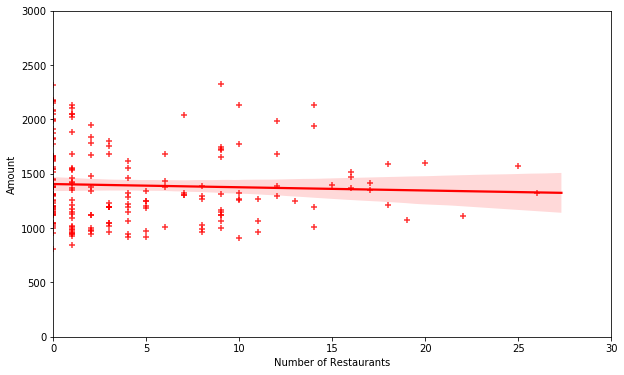

In [69]:
# Let's visualize
ax = sns.regplot(x="Number of Restaurants", y="Amount", data=df_merge_restaurant, color='red', marker='+')
ax.figure.set_size_inches(10, 6)
ax.set_ylim(0, 3000)
ax.set_xlim(0, 30)

In [70]:
# Take a look if there is some relation between number of restaurants and crime count
df_merge_restaurant[["Number of Restaurants", "Count"]].corr()

,Number of Restaurants,Count
Number of Restaurants,1.000000,-0.046933
Count,-0.046933,1.000000


(0, 300000)

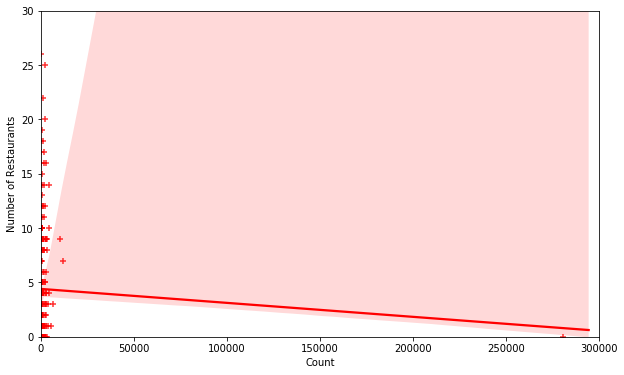

In [73]:
# Let's visualize
ax = sns.regplot(x="Count", y="Number of Restaurants", data=df_merge_restaurant, color='red', marker='+')
ax.figure.set_size_inches(10, 6)
ax.set_ylim(0, 30)
ax.set_xlim(0, 300000)

In [74]:
neighborhood_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Adams-Normandie,10,10,10,10,10,10
Agoura Hills,2,2,2,2,2,2
Agua Dulce,7,7,7,7,7,7
Alondra Park,3,3,3,3,3,3
Altadena,18,18,18,18,18,18
Angeles Crest,3,3,3,3,3,3
Arcadia,8,8,8,8,8,8
Arleta,4,4,4,4,4,4
Arlington Heights,9,9,9,9,9,9


In [75]:
count_venue = neighborhood_venues.groupby('Neighborhood')['Venue'].count()
count_venue.head()

Neighborhood
Adams-Normandie    10
Agoura Hills        2
Agua Dulce          7
Alondra Park        3
Altadena           18
Name: Venue, dtype: int64

In [76]:
df_merge_venue = pd.merge(df_merge_restaurant, count_venue, on='Neighborhood', how='left')
df_merge_venue.head()

,Neighborhood,Count,Weight_x,Amount,Weight_y,Latitude,Longitude,Number of Restaurants,Weight_z,Venue
0,Adams-Normandie,541.648985,0.771291,920.742857,0.337153,34.033081,-118.297115,5.0,0.143713,10
1,Agoura Hills,189.029737,0.920183,2052.500000,-0.477604,34.136395,-118.774535,1.0,-0.771257,2
2,Agua Dulce,44.202726,0.981336,1130.200000,0.186364,34.496382,-118.325635,1.0,-0.771257,7
3,Alondra Park,105.068139,0.955635,1667.142857,-0.200184,33.890134,-118.335133,0.0,-1.000000,3
4,Altadena,521.410078,0.779837,1458.321429,-0.049852,34.186316,-118.135233,1.0,-0.771257,18


In [77]:
df_merge_venue.rename(columns={"Venue": "Number of Venues"}, inplace=True)
df_merge_venue.head()

,Neighborhood,Count,Weight_x,Amount,Weight_y,Latitude,Longitude,Number of Restaurants,Weight_z,Number of Venues
0,Adams-Normandie,541.648985,0.771291,920.742857,0.337153,34.033081,-118.297115,5.0,0.143713,10
1,Agoura Hills,189.029737,0.920183,2052.500000,-0.477604,34.136395,-118.774535,1.0,-0.771257,2
2,Agua Dulce,44.202726,0.981336,1130.200000,0.186364,34.496382,-118.325635,1.0,-0.771257,7
3,Alondra Park,105.068139,0.955635,1667.142857,-0.200184,33.890134,-118.335133,0.0,-1.000000,3
4,Altadena,521.410078,0.779837,1458.321429,-0.049852,34.186316,-118.135233,1.0,-0.771257,18


In [78]:
data_venue = df_merge_venue.head(20)

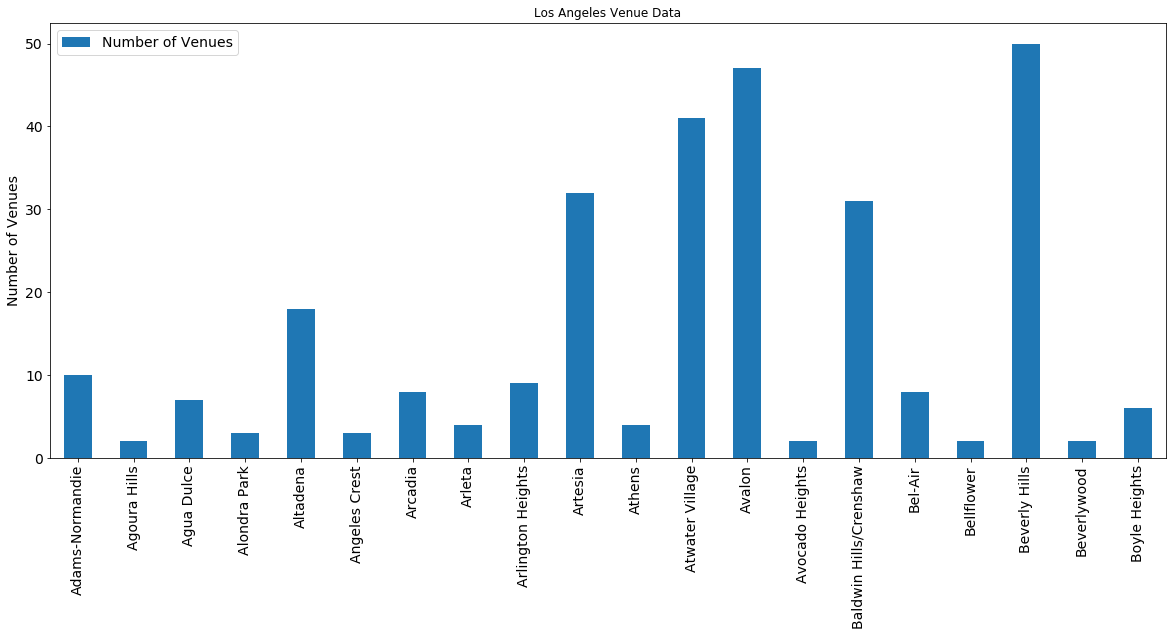

In [79]:
# Plot bar chart with respect to the number of venues
data_venue.plot(kind='bar', x='Neighborhood', y='Number of Venues', figsize=(20, 8), fontsize = 14)
plt.xlabel('') # add to x-label to the plot
plt.ylabel('Number of Venues', fontsize=14) # add y-label to the plot
plt.title('Los Angeles Venue Data') # add title to the plot
plt.legend(fontsize=14)
plt.show()

In [80]:
#Assign weights to the number of restaurants for each neighborhood using mean function
print (df_merge_venue['Number of Venues'].mean())
df_merge_venue['Weight_w'] = (df_merge_venue['Number of Venues']-df_merge_venue['Number of Venues'].mean())/df_merge_venue['Number of Venues'].mean()
df_merge_venue.head()

16.445026178010473


,Neighborhood,Count,Weight_x,Amount,Weight_y,Latitude,Longitude,Number of Restaurants,Weight_z,Number of Venues,Weight_w
0,Adams-Normandie,541.648985,0.771291,920.742857,0.337153,34.033081,-118.297115,5.0,0.143713,10,-0.391913
1,Agoura Hills,189.029737,0.920183,2052.500000,-0.477604,34.136395,-118.774535,1.0,-0.771257,2,-0.878383
2,Agua Dulce,44.202726,0.981336,1130.200000,0.186364,34.496382,-118.325635,1.0,-0.771257,7,-0.574339
3,Alondra Park,105.068139,0.955635,1667.142857,-0.200184,33.890134,-118.335133,0.0,-1.000000,3,-0.817574
4,Altadena,521.410078,0.779837,1458.321429,-0.049852,34.186316,-118.135233,1.0,-0.771257,18,0.094556


In [81]:
df_merge_venue.dropna(inplace=True)

In [82]:
df_merge_venue.head()

,Neighborhood,Count,Weight_x,Amount,Weight_y,Latitude,Longitude,Number of Restaurants,Weight_z,Number of Venues,Weight_w
0,Adams-Normandie,541.648985,0.771291,920.742857,0.337153,34.033081,-118.297115,5.0,0.143713,10,-0.391913
1,Agoura Hills,189.029737,0.920183,2052.500000,-0.477604,34.136395,-118.774535,1.0,-0.771257,2,-0.878383
2,Agua Dulce,44.202726,0.981336,1130.200000,0.186364,34.496382,-118.325635,1.0,-0.771257,7,-0.574339
3,Alondra Park,105.068139,0.955635,1667.142857,-0.200184,33.890134,-118.335133,0.0,-1.000000,3,-0.817574
4,Altadena,521.410078,0.779837,1458.321429,-0.049852,34.186316,-118.135233,1.0,-0.771257,18,0.094556


In [83]:
# Take a look if there is some relation between number of venues and rent price
df_merge_venue[["Number of Venues", "Amount"]].corr()

,Number of Venues,Amount
Number of Venues,1.000000,0.006193
Amount,0.006193,1.000000


(0, 55)

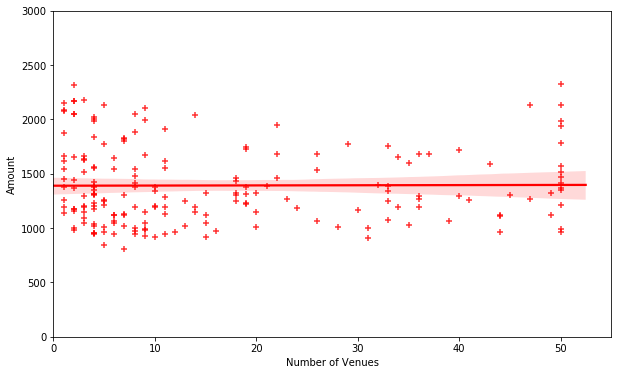

In [85]:
# Let's visualize
ax = sns.regplot(x="Number of Venues", y="Amount", data=df_merge_venue, color='red', marker='+')
ax.figure.set_size_inches(10, 6)
ax.set_ylim(0, 3000)
ax.set_xlim(0, 55)

In [86]:
# Take a look if there is some relation between number of venues and crime count
df_merge_venue[["Number of Venues", "Count"]].corr()

,Number of Venues,Count
Number of Venues,1.000000,-0.035515
Count,-0.035515,1.000000


(0, 300000)

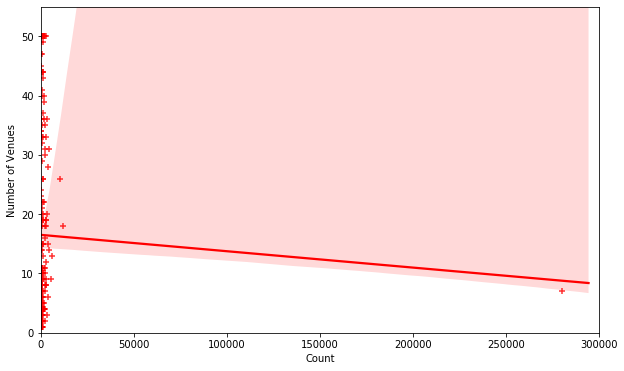

In [87]:
# Let's visualize
ax = sns.regplot(x="Count", y="Number of Venues", data=df_merge_venue, color='red', marker='+')
ax.figure.set_size_inches(10, 6)
ax.set_ylim(0, 55)
ax.set_xlim(0, 300000)

In [88]:
# Take a look if there is some relation among all factors
# The relation between number of restaurants and number of venues is ignored here, because restaurant is a venue
df_merge_venue[["Count", "Amount", "Number of Restaurants", "Number of Venues"]].corr()

,Count,Amount,Number of Restaurants,Number of Venues
Count,1.000000,0.072283,-0.046933,-0.035515
Amount,0.072283,1.000000,-0.045927,0.006193
Number of Restaurants,-0.046933,-0.045927,1.000000,0.844935
Number of Venues,-0.035515,0.006193,0.844935,1.000000


Changing assumption again.
<br>
For some reason FOURSQUARE cannot find train station in each neighborhood.
<br>
I have tried to use search_query='train station' and category_id=4bf58dd8d48988d129951735, both with no matching results.
<br>
Therefore, I have to give up on this particular factor.

In [89]:
# one hot encoding
la_onehot = pd.get_dummies(neighborhood_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
la_onehot['Neighborhood'] = neighborhood_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [la_onehot.columns[-1]] + list(la_onehot.columns[:-1])
la_onehot = la_onehot[fixed_columns]

la_onehot.head()

,Yoga Studio,ATM,Accessories Store,Advertising Agency,Airport,American Restaurant,Amphitheater,Aquarium,Arcade,Argentinian Restaurant,...,Video Store,Vietnamese Restaurant,Volleyball Court,Water Park,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [90]:
la_onehot.shape

(3141, 302)

In [91]:
la_grouped = la_onehot.groupby('Neighborhood').mean().reset_index()
la_grouped

,Neighborhood,Yoga Studio,ATM,Accessories Store,Advertising Agency,Airport,American Restaurant,Amphitheater,Aquarium,Arcade,...,Video Store,Vietnamese Restaurant,Volleyball Court,Water Park,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store
0,Adams-Normandie,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
1,Agoura Hills,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
2,Agua Dulce,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
3,Alondra Park,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
4,Altadena,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.0,0.0,0.000000,...,0.055556,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
5,Angeles Crest,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
6,Arcadia,0.000000,0.000000,0.000000,0.0,0.00,0.125000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
7,Arleta,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
8,Arlington Heights,0.111111,0.000000,0.000000,0.0,0.00,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.111111,0.000000
9,Artesia,0.000000,0.000000,0.000000,0.0,0.00,0.000000,0.0,0.0,0.000000,...,0.000000,0.062500,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000


In [92]:
la_grouped.shape

(191, 302)

In [93]:
# print each neighborhood along with the top 5 most common venues

num_top_venues = 5

for hood in la_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = la_grouped[la_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adams-Normandie----
                venue  freq
0    Sushi Restaurant   0.3
1          Taco Place   0.1
2                Café   0.1
3      Scenic Lookout   0.1
4  Mexican Restaurant   0.1


----Agoura Hills----
                           venue  freq
0                Thai Restaurant   0.5
1                   Home Service   0.5
2                    Yoga Studio   0.0
3  Paper / Office Supplies Store   0.0
4              Other Repair Shop   0.0


----Agua Dulce----
                venue  freq
0         Pizza Place  0.14
1       Grocery Store  0.14
2   Convenience Store  0.14
3                Café  0.14
4  Mexican Restaurant  0.14


----Alondra Park----
                     venue  freq
0           Baseball Field  0.33
1             Concert Hall  0.33
2                     Park  0.33
3              Yoga Studio  0.00
4  North Indian Restaurant  0.00


----Altadena----
                    venue  freq
0  Thrift / Vintage Store  0.11
1                  Bakery  0.06
2                Pharmacy 

In [94]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [95]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = la_grouped['Neighborhood']

for ind in np.arange(la_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(la_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adams-Normandie,Sushi Restaurant,Fast Food Restaurant,Mexican Restaurant,Scenic Lookout,Donut Shop,Taco Place,Gas Station,Café,Filipino Restaurant,Field
1,Agoura Hills,Thai Restaurant,Home Service,Field,English Restaurant,Exhibit,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
2,Agua Dulce,Grocery Store,Pizza Place,Bakery,Gift Shop,Café,Mexican Restaurant,Convenience Store,Fish Market,Flea Market,Financial or Legal Service
3,Alondra Park,Park,Concert Hall,Baseball Field,Women's Store,Field,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
4,Altadena,Thrift / Vintage Store,Food & Drink Shop,Coffee Shop,Bank,Bakery,Scenic Lookout,Grocery Store,Garden Center,Hardware Store,Fast Food Restaurant


In [96]:
la_train = df_merge_venue[['Neighborhood', 'Count', 'Amount', 'Number of Restaurants', 'Number of Venues']]
la_train.head()

,Neighborhood,Count,Amount,Number of Restaurants,Number of Venues
0,Adams-Normandie,541.648985,920.742857,5.0,10
1,Agoura Hills,189.029737,2052.500000,1.0,2
2,Agua Dulce,44.202726,1130.200000,1.0,7
3,Alondra Park,105.068139,1667.142857,0.0,3
4,Altadena,521.410078,1458.321429,1.0,18


In [97]:
la_merge = pd.merge(la_train, la_grouped, on='Neighborhood', how='inner')
la_merge.head()

,Neighborhood,Count,Amount,Number of Restaurants,Number of Venues,Yoga Studio,ATM,Accessories Store,Advertising Agency,Airport,...,Video Store,Vietnamese Restaurant,Volleyball Court,Water Park,Whisky Bar,Wine Bar,Wine Shop,Winery,Wings Joint,Women's Store
0,Adams-Normandie,541.648985,920.742857,5.0,10,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Agoura Hills,189.029737,2052.500000,1.0,2,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Agua Dulce,44.202726,1130.200000,1.0,7,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Alondra Park,105.068139,1667.142857,0.0,3,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Altadena,521.410078,1458.321429,1.0,18,0.0,0.0,0.0,0.0,0.0,...,0.055556,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [98]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 

In [99]:
la_merge_scale = la_merge.drop('Neighborhood', 1)
la_merge_scale = np.nan_to_num(la_merge_scale)
la_merge_cluster = StandardScaler().fit_transform(la_merge_scale)
la_merge_cluster

array([[-0.10081864, -1.32295502,  0.11357608, ..., -0.07254763,
        -0.20208731, -0.08991201],
       [-0.11826294,  1.8540728 , -0.60952499, ..., -0.07254763,
        -0.20208731, -0.08991201],
       [-0.12542763, -0.73497448, -0.60952499, ..., -0.07254763,
        -0.20208731, -0.08991201],
       ...,
       [-0.11474702, -0.23786586,  0.47512662, ..., -0.07254763,
        -0.20208731, -0.08991201],
       [-0.06156063, -0.54486751, -0.06719918, ..., -0.07254763,
        -0.20208731, -0.08991201],
       [-0.02270342,  1.65679156,  1.37900296, ..., -0.07254763,
        -0.20208731, -0.08991201]])

In [116]:
Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans = kmeans.fit(la_merge_cluster)
    Sum_of_squared_distances.append(kmeans.inertia_)

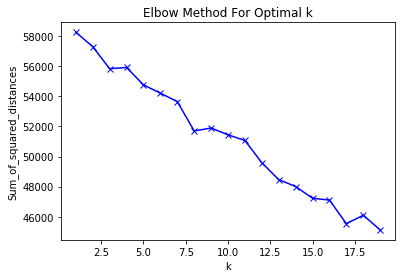

In [117]:
# To find the best k
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [118]:
# I think I might have done something wrong, since I wasn't able to locate the elbow
# I will simply cluster the neighborhoods into 15 clusters in this case

# set number of clusters
kclusters = 15

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(la_merge_cluster)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20]

array([11, 11, 11, 11, 11,  8, 11, 11, 11, 11, 11, 11,  4, 11,  4,  2, 11,
        9, 11, 11], dtype=int32)

In [119]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [120]:
la_merge_adj = df_merge_venue

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
la_merge_adj = la_merge_adj.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

la_merge_adj.head()

,Neighborhood,Count,Weight_x,Amount,Weight_y,Latitude,Longitude,Number of Restaurants,Weight_z,Number of Venues,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Adams-Normandie,541.648985,0.771291,920.742857,0.337153,34.033081,-118.297115,5.0,0.143713,10,...,Sushi Restaurant,Fast Food Restaurant,Mexican Restaurant,Scenic Lookout,Donut Shop,Taco Place,Gas Station,Café,Filipino Restaurant,Field
1,Agoura Hills,189.029737,0.920183,2052.500000,-0.477604,34.136395,-118.774535,1.0,-0.771257,2,...,Thai Restaurant,Home Service,Field,English Restaurant,Exhibit,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
2,Agua Dulce,44.202726,0.981336,1130.200000,0.186364,34.496382,-118.325635,1.0,-0.771257,7,...,Grocery Store,Pizza Place,Bakery,Gift Shop,Café,Mexican Restaurant,Convenience Store,Fish Market,Flea Market,Financial or Legal Service
3,Alondra Park,105.068139,0.955635,1667.142857,-0.200184,33.890134,-118.335133,0.0,-1.000000,3,...,Park,Concert Hall,Baseball Field,Women's Store,Field,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
4,Altadena,521.410078,0.779837,1458.321429,-0.049852,34.186316,-118.135233,1.0,-0.771257,18,...,Thrift / Vintage Store,Food & Drink Shop,Coffee Shop,Bank,Bakery,Scenic Lookout,Grocery Store,Garden Center,Hardware Store,Fast Food Restaurant


In [121]:
la_merge_adj['Cluster Labels'] = la_merge_adj['Cluster Labels'].astype(int)
la_merge_adj['Cluster Labels'].values

array([11, 11, 11, 11, 11,  8, 11, 11, 11, 11, 11, 11,  4, 11,  4,  2, 11,
        9, 11, 11, 11,  2, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11,  4, 11, 11, 11, 11,  2,  1, 11, 11, 12, 11, 11, 11, 11, 11, 11,
        8,  8, 11,  3, 11, 11, 11, 11, 11, 11,  8,  2, 11, 11, 11,  4, 11,
       11, 12, 11, 11,  2, 11, 11, 11, 11,  2, 11, 11, 11, 11, 11, 11,  8,
        8, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,  4,  4,  4, 11, 11, 11,
       11, 11, 11, 11,  8, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11,  4, 11,
       11,  4,  8, 11, 11, 11, 11, 11, 11,  0, 11, 11, 11, 11, 11,  5, 11,
       11, 11,  7,  0, 11, 11, 11,  4, 11, 11, 10, 11, 11, 11, 11, 11, 11,
       11,  4, 14, 11, 11, 11, 11, 11, 11, 11, 13,  0, 11,  0, 11, 11, 11,
        2, 11, 11, 11, 11, 11,  6, 11, 11, 11, 11, 11, 11,  2, 11, 11,  0,
       11, 11, 11, 11])

In [122]:
# create map
map_clusters = folium.Map(location=[34.0522, -118.2437], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lng, neighborhood, cluster in zip(la_merge_adj['Latitude'], la_merge_adj['Longitude'], la_merge_adj['Neighborhood'], la_merge_adj['Cluster Labels']):
    label = folium.Popup(str(neighborhood) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [123]:
# Examine different clusters
# Here I will only do three of them
la_merge_adj.loc[la_merge_adj['Cluster Labels'] == 0, la_merge_adj.columns[[0] + list(range(1, la_merge_adj.shape[1]))]]

,Neighborhood,Count,Weight_x,Amount,Weight_y,Latitude,Longitude,Number of Restaurants,Weight_z,Number of Venues,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
128,Rancho Dominguez,416.927852,0.823954,1135.285714,0.182703,33.859592,-118.210647,0.0,-1.000000,1,...,Food,Women's Store,Field,Exhibit,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant
139,San Pasqual,59.387775,0.974924,1345.785714,0.031163,34.139154,-118.102442,1.0,-0.771257,4,...,Liquor Store,Food,American Restaurant,Pharmacy,Field,Exhibit,Fabric Shop,Falafel Restaurant,Farm,Farmers Market
164,Vermont Square,1635.531959,0.309404,956.000000,0.311771,34.000140,-118.295890,0.0,-1.000000,4,...,Liquor Store,Park,Food,Field,Exhibit,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
166,View Park-Windsor Hills,282.684976,0.880637,1253.714286,0.097445,33.995731,-118.352610,0.0,-1.000000,1,...,Park,Women's Store,Field,Exhibit,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Filipino Restaurant
186,Willowbrook,1063.676051,0.550867,1050.285714,0.243895,33.918786,-118.234393,0.0,-1.000000,3,...,Liquor Store,Convenience Store,Burger Joint,Filipino Restaurant,Fabric Shop,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Field


In [124]:
la_merge_adj.loc[la_merge_adj['Cluster Labels'] == 1, la_merge_adj.columns[[0] + list(range(1, la_merge_adj.shape[1]))]]

,Neighborhood,Count,Weight_x,Amount,Weight_y,Latitude,Longitude,Number of Restaurants,Weight_z,Number of Venues,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
41,Downey,95.118663,0.959837,1259.0,0.09364,33.942215,-118.123565,1.0,-0.771257,5,...,Football Stadium,Fried Chicken Joint,American Restaurant,Track,High School,Field,Fabric Shop,Falafel Restaurant,Farm,Farmers Market


In [125]:
la_merge_adj.loc[la_merge_adj['Cluster Labels'] == 2, la_merge_adj.columns[[0] + list(range(1, la_merge_adj.shape[1]))]]

,Neighborhood,Count,Weight_x,Amount,Weight_y,Latitude,Longitude,Number of Restaurants,Weight_z,Number of Venues,...,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Bel-Air,78.544445,0.966835,1885.285714,-0.357226,34.082728,-118.447980,1.0,-0.771257,8,...,Hotel Bar,Spa,Hotel Pool,Hotel,Café,Golf Course,Restaurant,Women's Store,Farm,English Restaurant
21,Brentwood,912.723357,0.614606,1949.714286,-0.403608,34.052140,-118.474070,2.0,-0.542515,22,...,Spa,Italian Restaurant,Sporting Goods Shop,Sandwich Place,Café,Grocery Store,Cafeteria,Gym / Fitness Center,Farmers Market,Athletics & Sports
40,Diamond Bar,660.818468,0.720972,1796.920635,-0.293611,34.028623,-117.810337,3.0,-0.313772,7,...,Fast Food Restaurant,Convenience Store,American Restaurant,Fried Chicken Joint,Sandwich Place,Spa,Deli / Bodega,Exhibit,Food & Drink Shop,Food
62,Hacienda Heights,1021.739540,0.568575,1678.582418,-0.208419,33.993068,-117.968676,12.0,1.744910,37,...,Chinese Restaurant,Pharmacy,Pizza Place,Sports Bar,Spa,Fast Food Restaurant,Café,Bar,Lingerie Store,Mexican Restaurant
72,Huntington Park,97.264245,0.958931,943.744361,0.320594,33.982704,-118.212034,1.0,-0.771257,4,...,Fried Chicken Joint,Accessories Store,Burger Joint,Mexican Restaurant,Women's Store,Financial or Legal Service,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant
77,La Canada Flintridge,291.247309,0.877022,2047.035714,-0.473670,34.199830,-118.200524,1.0,-0.771257,8,...,Spa,Café,Grocery Store,Pizza Place,Bookstore,Mobile Phone Shop,Steakhouse,Mexican Restaurant,Filipino Restaurant,Farm
170,Watts,1418.216482,0.401164,928.446429,0.331607,33.940567,-118.242848,1.0,-0.771257,9,...,Light Rail Station,Bank,Grocery Store,Sandwich Place,Fried Chicken Joint,Pharmacy,Fast Food Restaurant,Sculpture Garden,Café,Falafel Restaurant
183,Westwood,1079.013912,0.544391,1836.761905,-0.322293,34.056121,-118.430635,2.0,-0.542515,4,...,Coffee Shop,Italian Restaurant,Fast Food Restaurant,Food Truck,Food,Food & Drink Shop,Flower Shop,Flea Market,Fish Market,Financial or Legal Service


As fun as segmenting and clustering neighborhoods are, I soon realized that the solution to our problem requires a little more than what we have done so far. With respect to Stella's weight assignments, we can list out the neighborhoods with highest weighted score as follows.

In [126]:
# First, let's scale all weights
X = df_merge_venue[['Weight_x', 'Weight_y', 'Weight_z', 'Weight_w']]
X = np.nan_to_num(X)
scaled_dataset = StandardScaler().fit_transform(X)
scaled_dataset

array([[ 1.00818641e-01,  1.32295502e+00,  1.13576085e-01,
        -4.10434586e-01],
       [ 1.18262943e-01, -1.85407280e+00, -6.09524988e-01,
        -9.19893602e-01],
       [ 1.25427628e-01,  7.34974483e-01, -6.09524988e-01,
        -6.01481717e-01],
       [ 1.22416577e-01, -7.72312131e-01, -7.90300256e-01,
        -8.56211225e-01],
       [ 1.01819873e-01, -1.86116151e-01, -6.09524988e-01,
         9.90244290e-02],
       [ 1.15777460e-01,  5.54674355e-01, -7.90300256e-01,
        -8.56211225e-01],
       [ 1.24039453e-01,  4.68693395e-02, -4.28749720e-01,
        -5.37799340e-01],
       [ 1.00997711e-01, -4.44742837e-01, -6.09524988e-01,
        -7.92528848e-01],
       [ 9.52621478e-02,  1.11791174e+00, -6.09524988e-01,
        -4.74116963e-01],
       [ 1.06639302e-01, -2.33340629e-02,  1.92132877e+00,
         9.90577706e-01],
       [ 1.06444567e-01,  1.23079984e+00, -6.09524988e-01,
        -7.92528848e-01],
       [ 1.09107895e-01,  3.73946469e-01,  1.01745243e+00,
      

In [127]:
x_train = pd.DataFrame(scaled_dataset)
x_train.head()

,0,1,2,3
0,0.100819,1.322955,0.113576,-0.410435
1,0.118263,-1.854073,-0.609525,-0.919894
2,0.125428,0.734974,-0.609525,-0.601482
3,0.122417,-0.772312,-0.790300,-0.856211
4,0.101820,-0.186116,-0.609525,0.099024


In [128]:
x_train.columns = ['Crime', 'Rent', 'Restaurant', 'Other venues']
x_train.head()

,Crime,Rent,Restaurant,Other venues
0,0.100819,1.322955,0.113576,-0.410435
1,0.118263,-1.854073,-0.609525,-0.919894
2,0.125428,0.734974,-0.609525,-0.601482
3,0.122417,-0.772312,-0.790300,-0.856211
4,0.101820,-0.186116,-0.609525,0.099024


In [129]:
# Adjust values according to Stella's weight percentage
x_train['Crime'] = x_train['Crime'].apply(lambda x: x*30)
x_train['Rent'] = x_train['Rent'].apply(lambda x: x*25)
x_train['Restaurant'] = x_train['Restaurant'].apply(lambda x: x*25)
x_train['Other venues'] = x_train['Other venues'].apply(lambda x: x*20)
x_train.head()

,Crime,Rent,Restaurant,Other venues
0,3.024559,33.073875,2.839402,-8.208692
1,3.547888,-46.351820,-15.238125,-18.397872
2,3.762829,18.374362,-15.238125,-12.029634
3,3.672497,-19.307803,-19.757506,-17.124224
4,3.054596,-4.652904,-15.238125,1.980489


In [130]:
x_train.insert(0, column='Neighborhood', value=df_merge_venue['Neighborhood'].values) 
x_train.head()

,Neighborhood,Crime,Rent,Restaurant,Other venues
0,Adams-Normandie,3.024559,33.073875,2.839402,-8.208692
1,Agoura Hills,3.547888,-46.351820,-15.238125,-18.397872
2,Agua Dulce,3.762829,18.374362,-15.238125,-12.029634
3,Alondra Park,3.672497,-19.307803,-19.757506,-17.124224
4,Altadena,3.054596,-4.652904,-15.238125,1.980489


In [131]:
final = x_train.sum(axis=1)
final.head()

0    30.729145
1   -76.439928
2    -5.130568
3   -52.517037
4   -14.855944
dtype: float64

In [132]:
x_train['Weighted Score'] = final

In [133]:
x_train.head()

,Neighborhood,Crime,Rent,Restaurant,Other venues,Weighted Score
0,Adams-Normandie,3.024559,33.073875,2.839402,-8.208692,30.729145
1,Agoura Hills,3.547888,-46.351820,-15.238125,-18.397872,-76.439928
2,Agua Dulce,3.762829,18.374362,-15.238125,-12.029634,-5.130568
3,Alondra Park,3.672497,-19.307803,-19.757506,-17.124224,-52.517037
4,Altadena,3.054596,-4.652904,-15.238125,1.980489,-14.855944


In [134]:
x_train_weight = x_train.sort_values(by='Weighted Score', ascending=False)

In [135]:
x_train_weight.head(20)

,Neighborhood,Crime,Rent,Restaurant,Other venues,Weighted Score
138,San Gabriel,3.765578,4.739120,97.746418,41.463562,147.714679
32,Chinatown,2.459168,19.403488,79.668891,35.095325,136.626872
102,Mid-Wilshire,0.896377,-12.279868,93.227036,42.737210,124.580756
95,Long Beach,3.828431,12.762358,61.591364,42.737210,120.919363
147,South San Gabriel,3.327528,22.194779,66.110746,21.085202,112.718254
175,West Hollywood,1.175810,2.681170,57.071983,42.737210,103.666172
104,Monrovia,3.755596,-1.687837,57.071983,42.737210,101.876952
96,Los Feliz,1.470305,1.948109,52.552601,42.737210,98.708224
66,Harvard Heights,2.745986,29.740702,29.955692,35.095325,97.537706
119,Pasadena,3.654782,-5.299861,52.552601,42.737210,93.644732


From here, Stella can either choose a neighborhood solely based on her weighted score as above, or choose a neighborhood from one of the clusters which contains the neighborhood with her desired weighted score.